# outliers

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch as t

## setup

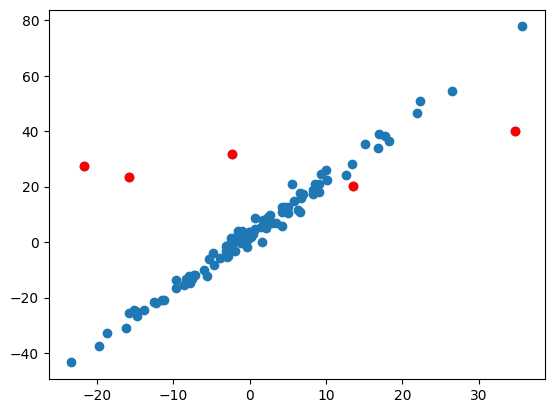

In [2]:
t.manual_seed(0xbadc0de)
xs = t.randn((100, 1)) * 10
ys = xs * 2 + 3 + t.randn((100, 1)) * 2
outliers = t.randn((5, 2)) * 20
data = t.cat((xs, ys), 1)
data = t.cat((data, outliers), 0)

plt.scatter(data[:, 0], data[:, 1])
plt.scatter(outliers[:, 0], outliers[:, 1], color='red')

## outliers with PCA

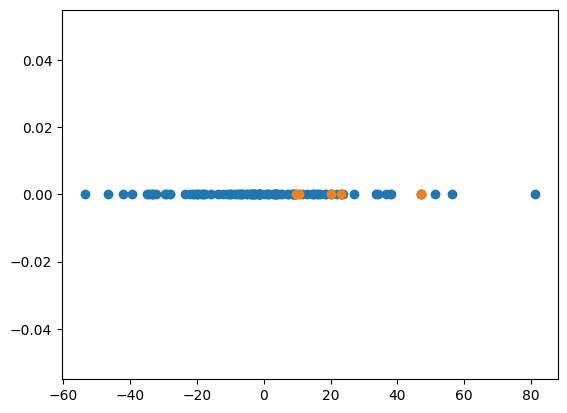

In [3]:
pca = PCA(n_components=1)
pca.fit(data)
flattened = t.tensor(pca.transform(data))
flattened_outliers = t.tensor(pca.transform(outliers))
plt.scatter(flattened, t.zeros_like(flattened))
plt.scatter(flattened_outliers, t.zeros_like(flattened_outliers))

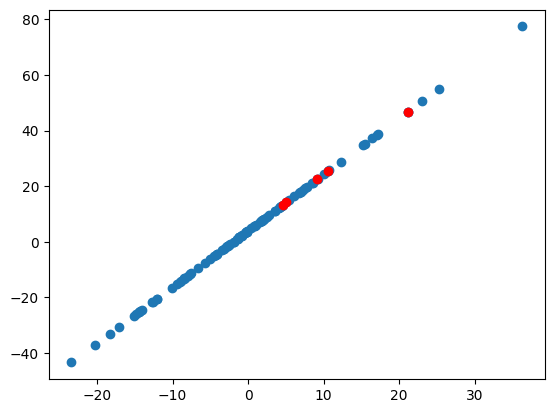

In [4]:
unflattened = pca.inverse_transform(flattened)
unflattened_outliers = pca.inverse_transform(flattened_outliers)
plt.scatter(unflattened[:, 0], unflattened[:, 1])
plt.scatter(unflattened_outliers[:, 0], unflattened_outliers[:, 1], color='red')

In [5]:
t.sum((unflattened - data)**2, dim=1).topk(5)

torch.return_types.topk(
values=tensor([890.6590, 518.2441, 229.0748, 208.2403,  23.2455], dtype=torch.float64),
indices=tensor([101, 104, 102, 100, 103]))